# Chapter One: Farmilirity

In [1]:
import os
os.environ['PROJ_DATA'] = '/home/billy/anaconda3/share/proj'

In [45]:
import pandas as pd
import geopandas as gpd
import fiona
import rasterio as rs
from shapely.geometry import shape, mapping
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import arrow
import json
import pyproj
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from rasterio.plot import show, show_hist
from glob import glob
from osgeo import gdal, ogr, osr

In [2]:
%matplotlib inline

### Vector Data basics

Text(0.5, 1.0, 'Crops types in the SA Field')

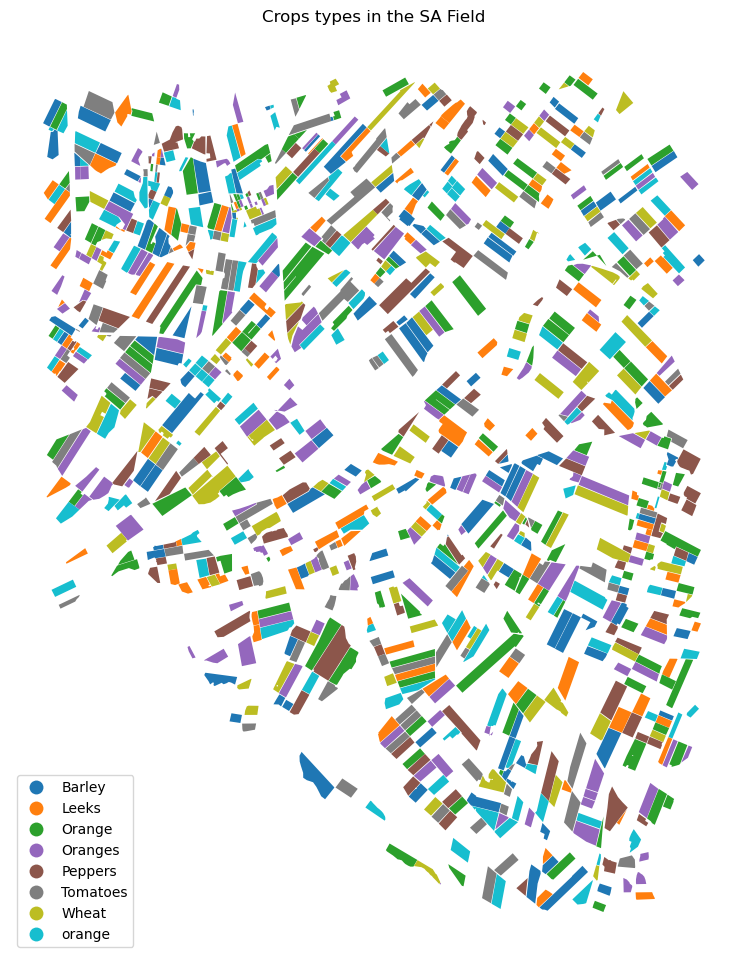

In [3]:
input_data = gpd.read_file("data/south_africa_crops/south_africa_crops.shp")
## plot the data 
fig, ax = plt.subplots(1, figsize=(12,12))
input_data.plot(column='CROPS',ax=ax,cmap='tab10',legend=True, legend_kwds={"loc":3})
ax.set_axis_off()
ax.set_title("Crops types in the SA Field")

### Check geometry of the data

In [4]:
AOI_Nakuru = gpd.read_file('data/AOI_Nakuru.shp')
AOI_Nakuru['id'] = 1
AOI_Nakuru.head()

id                                           geometry
0   1  POLYGON ((874412.665 9931472.686, 883176.279 9...

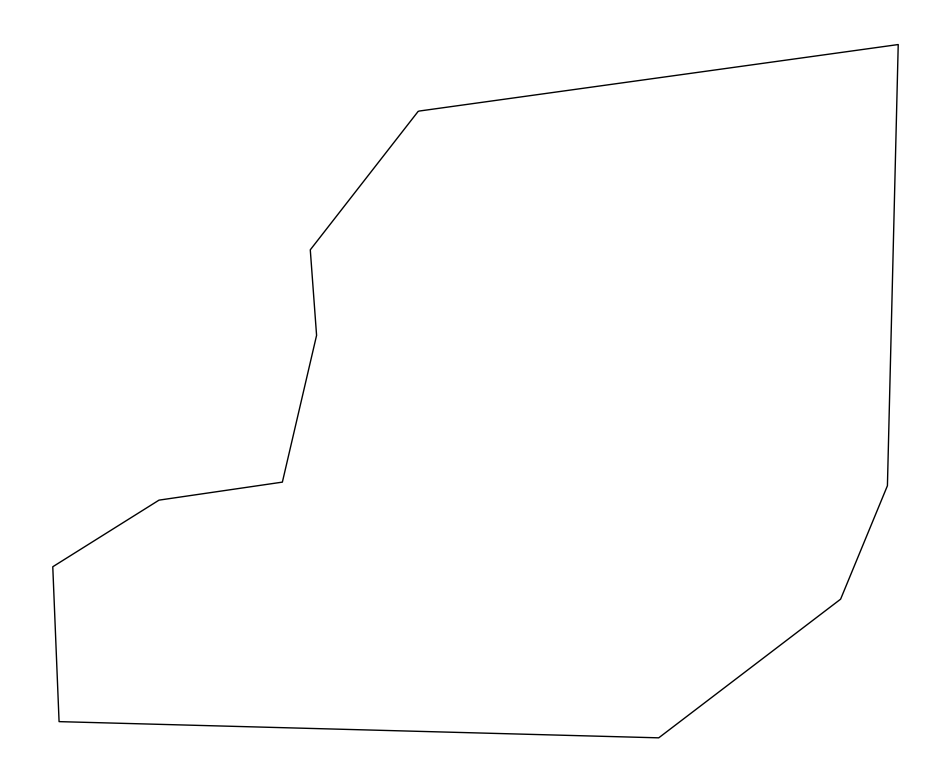

In [5]:
fig,ax=plt.subplots(1, figsize=(12,12))
AOI_Nakuru.plot(ax=ax,facecolor='white',edgecolor='k')
ax.set_axis_off()

In [6]:
small_fields=gpd.read_file('data/Small_Fields.shp')
small_fields['id'] = 1

In [7]:
small_fields.crs

<Projected CRS: PROJCS["WGS_1984_UTM_Zone_36S",GEOGCS["WGS 84",DAT ...>
Name: WGS_1984_UTM_Zone_36S
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 36S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
!ogrinfo data/Small_Fields.shp

INFO: Open of `data/Small_Fields.shp'
      using driver `ESRI Shapefile' successful.
1: Small_Fields (Polygon)


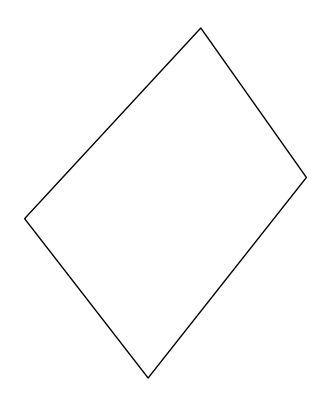

In [9]:
fig,ax = plt.subplots(1,figsize=(5,5))
small_fields.plot(ax=ax,facecolor='white',edgecolor='k')
ax.set_axis_off()

## Raster data basics

Get data information using GDAL cli 

In [10]:
!gdalinfo R10m/T36MZE_20230528T073621_B02_10m.jp2

Driver: JP2OpenJPEG/JPEG-2000 driver based on OpenJPEG library
Files: R10m/T36MZE_20230528T073621_B02_10m.jp2
Size is 10980, 10980
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 36S",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 36S",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",33,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
          

In [11]:
import glob
glob.glob('R10m/*.jp2')

['R10m/T36MZE_20230528T073621_B02_10m.jp2',
 'R10m/T36MZE_20230528T073621_AOT_10m.jp2',
 'R10m/T36MZE_20230528T073621_TCI_10m.jp2',
 'R10m/T36MZE_20230528T073621_B03_10m.jp2',
 'R10m/T36MZE_20230528T073621_B04_10m.jp2',
 'R10m/T36MZE_20230528T073621_B08_10m.jp2',
 'R10m/T36MZE_20230528T073621_WVP_10m.jp2']

In [12]:
glob.glob('R20m/*.jp2')

['R20m/T36MZE_20230528T073621_SCL_20m.jp2',
 'R20m/T36MZE_20230528T073621_B12_20m.jp2',
 'R20m/T36MZE_20230528T073621_B07_20m.jp2',
 'R20m/T36MZE_20230528T073621_B11_20m.jp2',
 'R20m/T36MZE_20230528T073621_B05_20m.jp2',
 'R20m/T36MZE_20230528T073621_B06_20m.jp2',
 'R20m/T36MZE_20230528T073621_B01_20m.jp2',
 'R20m/T36MZE_20230528T073621_TCI_20m.jp2',
 'R20m/T36MZE_20230528T073621_AOT_20m.jp2',
 'R20m/T36MZE_20230528T073621_WVP_20m.jp2',
 'R20m/T36MZE_20230528T073621_B04_20m.jp2',
 'R20m/T36MZE_20230528T073621_B02_20m.jp2',
 'R20m/T36MZE_20230528T073621_B8A_20m.jp2',
 'R20m/T36MZE_20230528T073621_B03_20m.jp2']

In [13]:
glob.glob('R60m/*.jp2')

['R60m/T36MZE_20230528T073621_B01_60m.jp2',
 'R60m/T36MZE_20230528T073621_TCI_60m.jp2',
 'R60m/T36MZE_20230528T073621_B02_60m.jp2',
 'R60m/T36MZE_20230528T073621_B04_60m.jp2',
 'R60m/T36MZE_20230528T073621_B05_60m.jp2',
 'R60m/T36MZE_20230528T073621_B8A_60m.jp2',
 'R60m/T36MZE_20230528T073621_B06_60m.jp2',
 'R60m/T36MZE_20230528T073621_B12_60m.jp2',
 'R60m/T36MZE_20230528T073621_B11_60m.jp2',
 'R60m/T36MZE_20230528T073621_B03_60m.jp2',
 'R60m/T36MZE_20230528T073621_WVP_60m.jp2',
 'R60m/T36MZE_20230528T073621_B07_60m.jp2',
 'R60m/T36MZE_20230528T073621_B09_60m.jp2',
 'R60m/T36MZE_20230528T073621_SCL_60m.jp2',
 'R60m/T36MZE_20230528T073621_AOT_60m.jp2']

#### Open raster file with rasterio

In [15]:
scene = rs.open('R10m/T36MZE_20230528T073621_B02_10m.jp2')

In [16]:
list(scene.bounds)

[799980.0, 9890200.0, 909780.0, 10000000.0]

In [17]:
scene.height

10980

In [18]:
scene.crs

In [19]:
scene.width

10980

In [20]:
scene.count

1

In [21]:
scene.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': None,
 'transform': Affine(10.0, 0.0, 799980.0,
        0.0, -10.0, 10000000.0)}

<Axes: title={'center': 'Band 2 Sentinel'}>

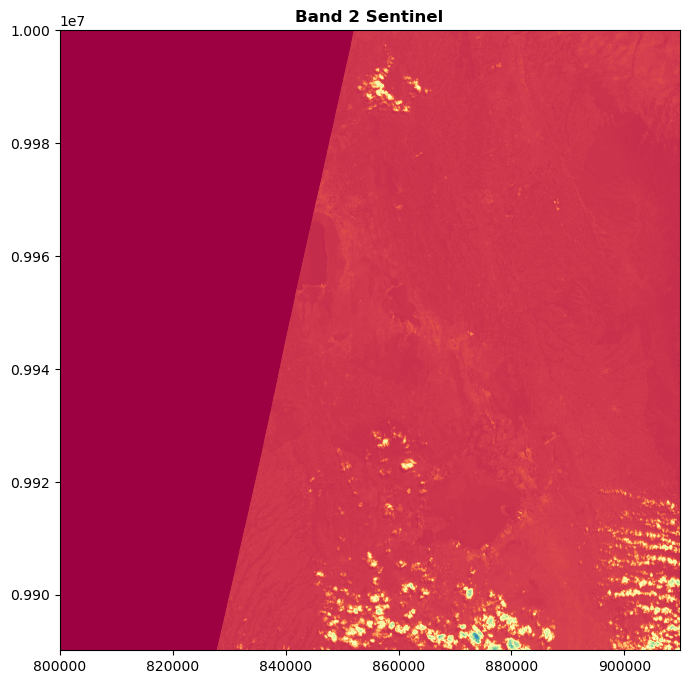

In [22]:
fig, ax = plt.subplots(1, figsize=(8,12))
show(scene,ax=ax,title='Band 2 Sentinel',cmap='Spectral')

### Clipping data with GDAL cli Tool

>Using the gdalwarp command, the data can be clipped to an area of interest using a shapefile.
> The gdalwarp combined with the necessary flags such as 
```
-cutline
```

```
-crop_to_cutline
```

```
-dstnodata
```

> We get the command:
  
```
gdalwarp -cutline data/AOI_Nakuru.shp -crop_to_cutline R10m/T36MZE_20230528T073621_B02_10m.jp2 -dstnodata 0 R10m/T36MZE_20230528T073621_B02_10m.jp2 band_2_clip.tif
```

In [22]:
!gdalwarp -cutline data/AOI_Nakuru.shp -crop_to_cutline R10m/T36MZE_20230528T073621_B02_10m.jp2 -dstnodata 0 -overwrite R10m/T36MZE_20230528T073621_B02_10m.jp2 band_2_clip.tif

Creating output file that is 1543P x 1265L.
Processing R10m/T36MZE_20230528T073621_B02_10m.jp2 [1/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Processing R10m/T36MZE_20230528T073621_B02_10m.jp2 [2/2] : 0...10...20...30...40...50...60...70...80...90...100 - done.


#### Getting the spatial resolution of the images: 

In [24]:
spatial_resX, spatial_resY = scene.res
print(str(spatial_resX)+'m', ' ' +str(spatial_resY)+'m')

10.0m  10.0m


### Plot the clipped area of interest using Rasterio

PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


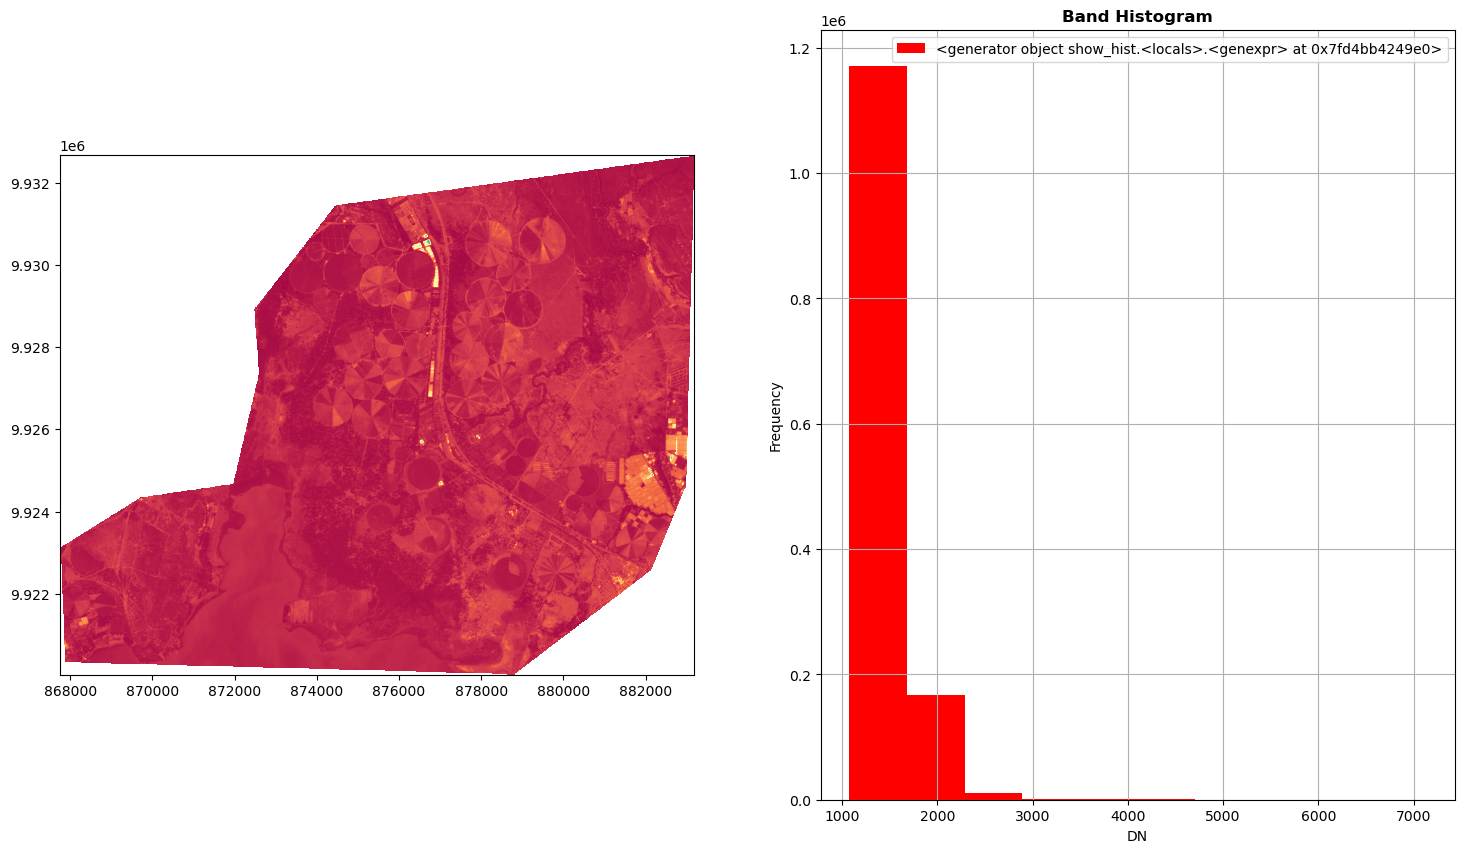

In [25]:
with rs.open('band_2_clip.tif','r') as band_2:
    print(band_2.crs)
    fig,ax = plt.subplots(1,2, figsize=(18,10))
    show(band_2,ax=ax[0],cmap='Spectral')
    show_hist(band_2,ax=ax[1],title='Band Histogram')

In [26]:
type(scene)

rasterio.io.DatasetReader

###### Read the scene data as Array using the read method in Rasterio

In [27]:
scene_array = scene.read()

### Opening data using GDAL

GDAL (Geospatial Data Abstraction Library) is an open source transalator library for raster and vector datasets and formats

In [28]:
from osgeo import gdal, ogr, osr

In [29]:
bandlist = glob.glob('R10m/*.jp2') + glob.glob('R60m/*.jp2') + glob.glob('R20m/*.jp2')

In [30]:
band_2_10m = gdal.Open('R10m/T36MZE_20230528T073621_B02_10m.jp2')

In [31]:
type(band_2_10m)

osgeo.gdal.Dataset

In [32]:
band_2_10m.GetGeoTransform()

(799980.0, 10.0, 0.0, 10000000.0, 0.0, -10.0)

##### Raster resolution

In [33]:
pixel_X = band_2_10m.GetGeoTransform()[1]
pixel_Y = abs(band_2_10m.GetGeoTransform()[5])
print(pixel_X)
print(pixel_Y)

10.0
10.0


In [34]:
band_2_10m.GetProjection()

'PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32736"]]'

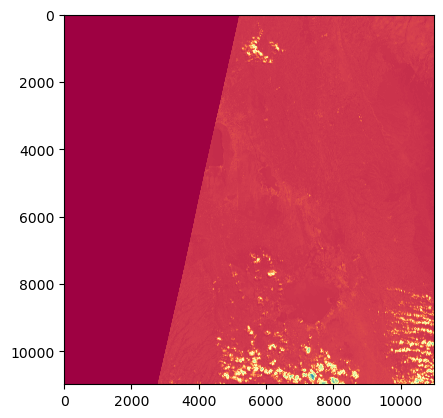

In [35]:
band_2 = band_2_10m.ReadAsArray()
plt.imshow(band_2, cmap='Spectral')
plt.show()

### Working with multi-band data

In [36]:
b2 = "R10m/T36MZE_20230528T073621_B02_10m.jp2"
b3 = "R10m/T36MZE_20230528T073621_B03_10m.jp2"
b4 =  "R10m/T36MZE_20230528T073621_B04_10m.jp2"
b8 =  "R10m/T36MZE_20230528T073621_B08_10m.jp2"
b12 = "R20m/T36MZE_20230528T073621_B12_20m.jp2"
b11 =  "R20m/T36MZE_20230528T073621_B11_20m.jp2"

In [37]:
b2_r = rs.open(b2)
b3_r = rs.open(b3)
b4_r = rs.open(b4)
b8_r = rs.open(b8)
b12_r = rs.open(b12)
b11_r = rs.open(b11)

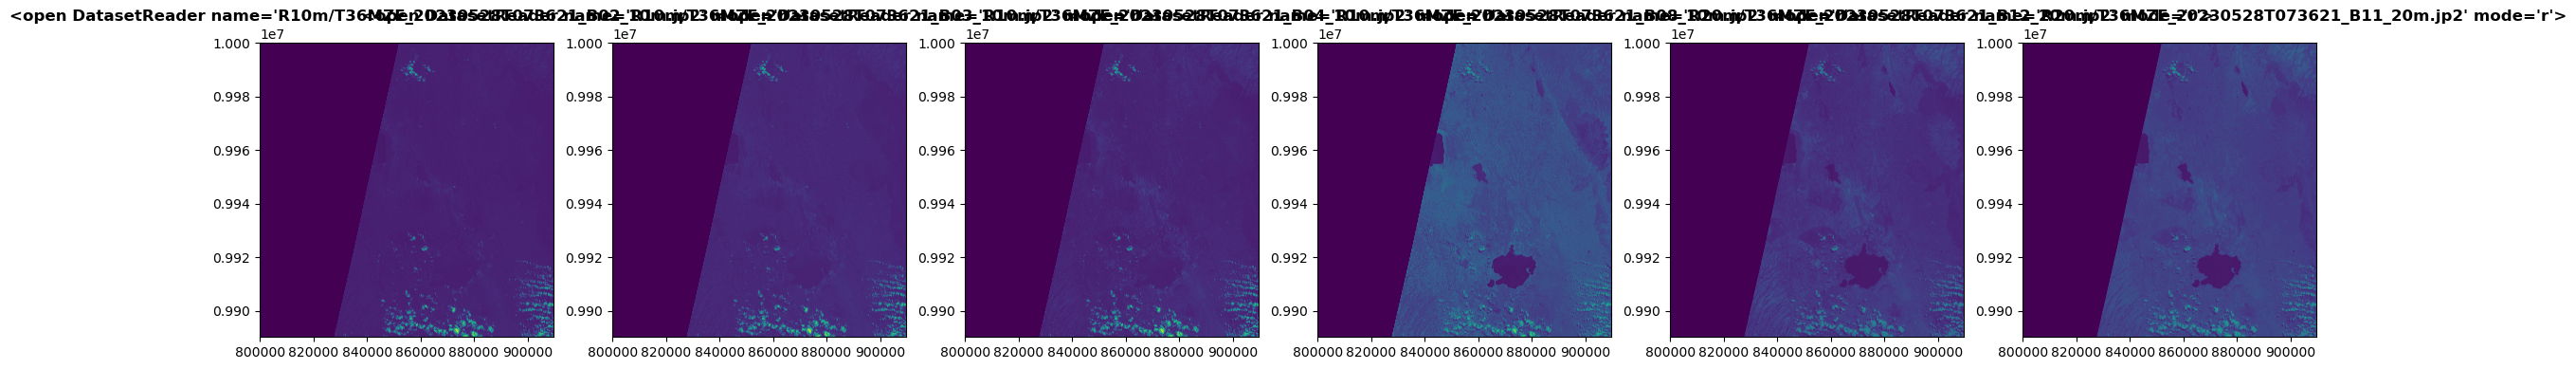

In [38]:
bands_data = [b2_r, b3_r, b4_r, b8_r, b12_r, b11_r ]
fig, ax = plt.subplots(1,6, figsize=(28,12))

for idx, band in enumerate(bands_data,start=0):
    show(band, ax=ax[idx], title=f'{band}')


In [39]:
for band in bands_data:
    print(f"Resolution for {band.name.split('_')[-2]} is", band.res)

Resolution for B02 is (10.0, 10.0)
Resolution for B03 is (10.0, 10.0)
Resolution for B04 is (10.0, 10.0)
Resolution for B08 is (10.0, 10.0)
Resolution for B12 is (20.0, 20.0)
Resolution for B11 is (20.0, 20.0)


#### Plotting with EarthPy

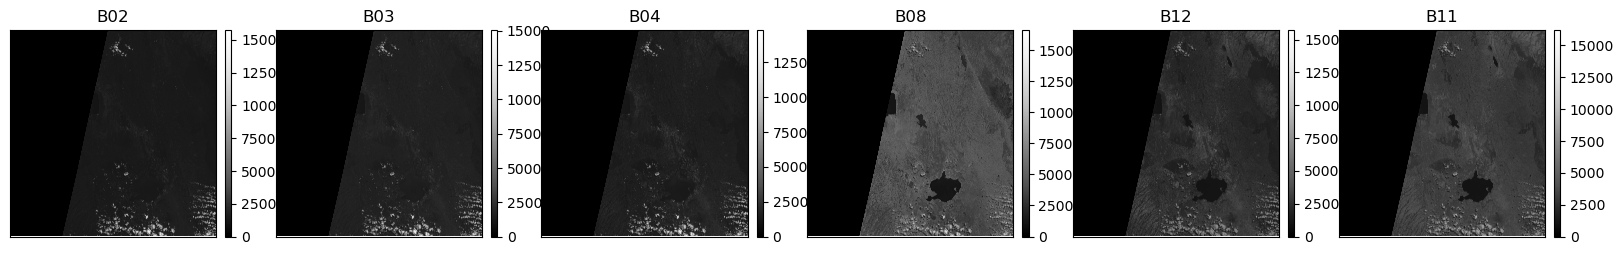

In [51]:
fig, ax = plt.subplots(1,6,figsize=(20,6))
for idx, band in enumerate(bands_data, start=0):
    ep.plot_bands(band.read(),title=f"{band.name.split('_')[-2]}", ax=ax[idx])

In [92]:
bands_data

[<open DatasetReader name='R10m/T36MZE_20230528T073621_B02_10m.jp2' mode='r'>,
 <open DatasetReader name='R10m/T36MZE_20230528T073621_B03_10m.jp2' mode='r'>,
 <open DatasetReader name='R10m/T36MZE_20230528T073621_B04_10m.jp2' mode='r'>,
 <open DatasetReader name='R10m/T36MZE_20230528T073621_B08_10m.jp2' mode='r'>,
 <open DatasetReader name='R20m/T36MZE_20230528T073621_B12_20m.jp2' mode='r'>,
 <open DatasetReader name='R20m/T36MZE_20230528T073621_B11_20m.jp2' mode='r'>]

### LAYER-STACKING Data

In [38]:
stacked_bands_path = "stacked_data.jp2"

In [39]:
selected_bands = glob.glob("R10m/T36MZE_20230528T073621_*B[02:03:04:08]*.jp2")
selected_bands.sort()

In [40]:
selected_bands

['R10m/T36MZE_20230528T073621_B02_10m.jp2',
 'R10m/T36MZE_20230528T073621_B03_10m.jp2',
 'R10m/T36MZE_20230528T073621_B04_10m.jp2',
 'R10m/T36MZE_20230528T073621_B08_10m.jp2']

In [41]:
selected_bandsout_path='stac'

In [42]:
swir_bands = glob.glob("R20m/T36MZE_20230528T073621_*B[11:12]*.jp2")

In [43]:
swir_bands

['R20m/T36MZE_20230528T073621_B12_20m.jp2',
 'R20m/T36MZE_20230528T073621_B11_20m.jp2']

### Layer Stacking using rio cli and GDAL tools


> Using the rio command line utility the images can be layer stacked as shown below: 


In [45]:
!ls

band_2_clip.tif  OutputImage.vrt  R20m	stacked_image.jp2
data		 R10m		  R60m	Working_with_data.ipynb


In [47]:
!gdal_translate -r cubic -a_nodata 0 -strict -of GTiff R10m/T36MZE_20230528T073621_B02_10m.jp2 band2.tif

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


In [48]:
!gdal_translate -r cubic -a_nodata 0 -strict -of GTiff R10m/T36MZE_20230528T073621_B03_10m.jp2 band3.tif

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


In [49]:
!gdal_translate -r cubic -a_nodata 0 -strict -of GTiff R10m/T36MZE_20230528T073621_B04_10m.jp2 band4.tif

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


In [2]:
!gdal_translate -r cubic -a_nodata 0 -strict -of GTiff R10m/T36MZE_20230528T073621_B08_10m.jp2 band8.tif

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


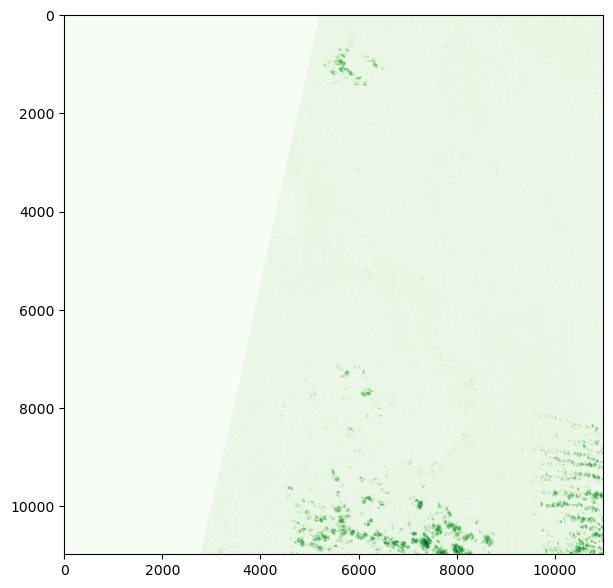

In [17]:
with rs.open('band2.tif') as band_2:
    band2 = band_2.read()
    fig, ax = plt.subplots(1,figsize=(12,7))
    show(band2,ax=ax,cmap='Greens')

In [24]:
k = glob.glob("band*[2-4].tif")
k.sort()

In [25]:
k

['band2.tif', 'band3.tif', 'band4.tif']

In [19]:
band_2.transform

Affine(10.0, 0.0, 799980.0,
       0.0, -10.0, 10000000.0)

In [ ]:
sentinel_bands_path = "band*[2-4]*.tif"
stack_band_paths = glob.glob(sentinel_bands_path)
stack_band_paths.sort()

# Create output directory and the output path
raster_out_path = os.path.join("stacked_raster.tif")

array, raster_prof = es.stack(stack_band_paths, out_path=raster_out_path)

#### Staking using rio cli

In [ ]:
!rio stack band2.tif band3.tif band4.tif --overwrite -o geotiff_stack.tif

In [71]:
!ls

band_2_clip.tif  R20m			  stacked_rgb_images2.jp2.aux.xml
data		 R60m			  stacked_rgb_images.jp2
R10m		 stacked_rgb_images2.jp2  Working_with_data.ipynb


### Stacking using GDAL

#### Create a VRT (Virtual Raster Layer) to separate the bands

In [27]:
from osgeo import gdal
imageList = glob.glob("band*[2-4].tif")
imageList.sort()

In [29]:
imageList

['band2.tif', 'band3.tif', 'band4.tif']

In [32]:
VRT = 'OutputImage.vrt'
vrt_layer = gdal.BuildVRT(VRT, imageList, separate=True)

In [33]:
input_image = gdal.Open(VRT)

gdal.Translate('rgb_stack.tiff',input_image,format='GTiff',creationOptions=['COMPRESS:DEFLATE','TILED:YES'],
               callback = gdal.TermProgress_nocb
              )

del input_image

0...10...20...30...40...50...60...70...80...90...

In [21]:
rgb_file  = rs.open('rgb_stack.tiff')
rgb_opened = rgb_file.read()

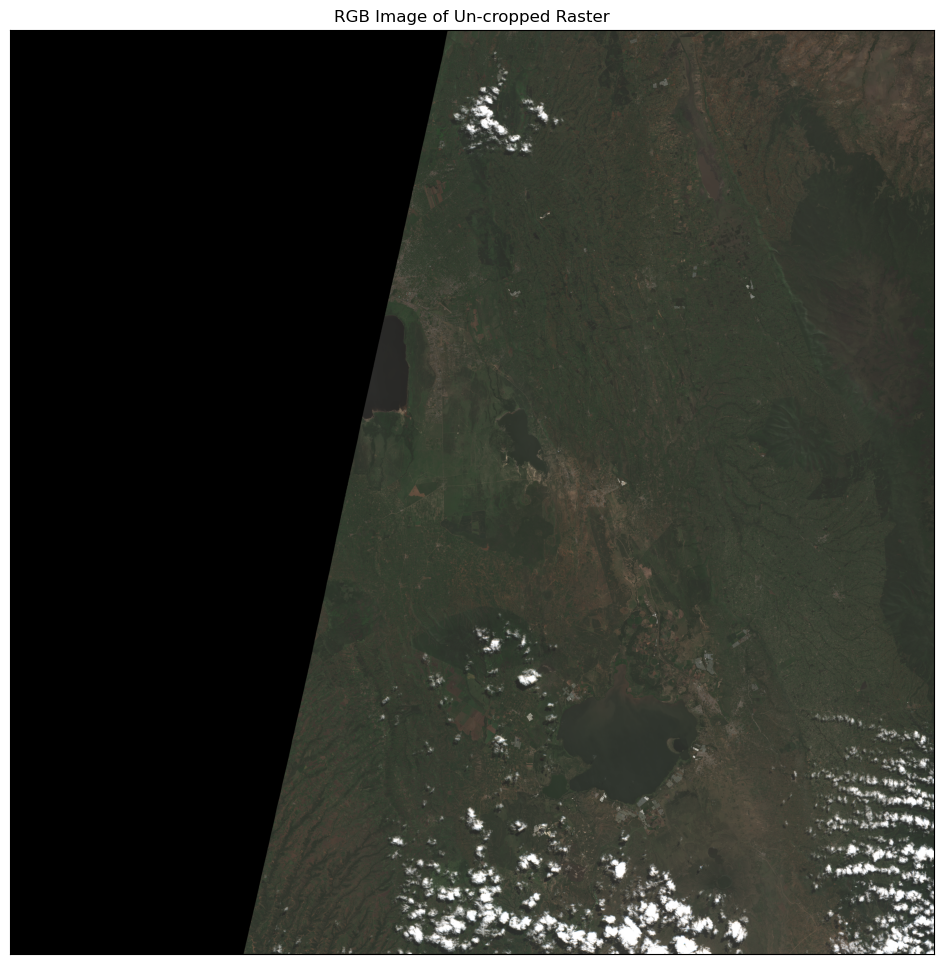

In [34]:
rgb_file  = rs.open('rgb_stack.tiff')
rgb_opened = rgb_file.read()
fig, ax = plt.subplots(1,figsize=(12, 12))
ep.plot_rgb(rgb_opened,rgb = (2,1,0), ax=ax,stretch=True,str_clip=0.5,title="RGB Image of Un-cropped Raster")
plt.show()

#### Cropping the dataset: 

In [15]:
!gdalwarp -overwrite -cutline data/AOI_Nakuru.shp -crop_to_cutline -dstnodata 0 rgb_stack.tiff rgb_clipped.tiff

Creating output file that is 1543P x 1265L.
Processing rgb_stack.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image rgb_stack.tiff.
...10...20...30...40...50...60...70...80...90...100 - done.


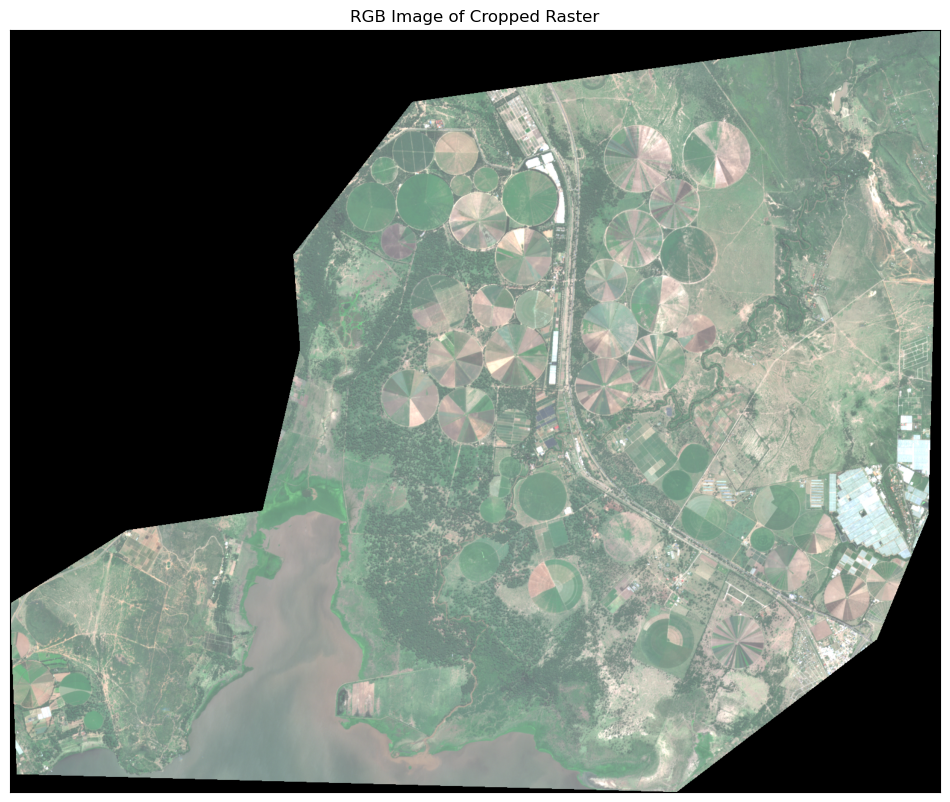

In [16]:
rgb_clip_path  = rs.open('rgb_clipped.tiff')
rgb_clip = rgb_clip_path.read()
fig, ax = plt.subplots(1,figsize=(12, 12))
ep.plot_rgb(rgb_clip,rgb = (2,1,0), ax=ax,stretch=True,str_clip=0.5,title="RGB Image of Cropped Raster")
plt.show()    

In [ ]:
## Vegetation Indices

### 1. Healthy Vegetation

In [18]:
!ls

band2.tif  band8.tif	    R10m  rgb_clipped.tiff
band3.tif  data		    R20m  rgb_stack.tiff
band4.tif  OutputImage.vrt  R60m  Working_with_data.ipynb


In [21]:
!gdalwarp -cutline data/Small_Fields.shp -crop_to_cutline band2.tif -dstnodata 0 -overwrite band2.tif band_2_field.tif

Creating output file that is 135P x 168L.
Processing band2.tif [1/2] : 0Using internal nodata values (e.g. 0) for image band2.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing band2.tif [2/2] : 0Using internal nodata values (e.g. 0) for image band2.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [24]:
!gdalwarp -cutline data/Small_Fields.shp -crop_to_cutline band3.tif -dstnodata 0 -overwrite band3.tif band_3_field.tif

Creating output file that is 135P x 168L.
Processing band3.tif [1/2] : 0Using internal nodata values (e.g. 0) for image band3.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing band3.tif [2/2] : 0Using internal nodata values (e.g. 0) for image band3.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [25]:
!gdalwarp -cutline data/Small_Fields.shp -crop_to_cutline band4.tif -dstnodata 0 -overwrite band4.tif band_4_field.tif

Creating output file that is 135P x 168L.
Processing band4.tif [1/2] : 0Using internal nodata values (e.g. 0) for image band4.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing band4.tif [2/2] : 0Using internal nodata values (e.g. 0) for image band4.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [26]:
!gdalwarp -cutline data/Small_Fields.shp -crop_to_cutline band8.tif -dstnodata 0 -overwrite band8.tif band_8_field.tif

Creating output file that is 135P x 168L.
Processing band8.tif [1/2] : 0Using internal nodata values (e.g. 0) for image band8.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing band8.tif [2/2] : 0Using internal nodata values (e.g. 0) for image band8.tif.
...10...20...30...40...50...60...70...80...90...100 - done.


In [29]:
def open_and_plot_band(band_name):
    if isinstance(band_name,str):
        with rs.open(band_name) as band:
            print(band.crs)
            fig, ax = plt.subplots(1,2, figsize=(18,10))
            show(band, ax=ax[0], cmap='Spectral')
            show_hist(band, ax=ax[1],title='Band Histogram')
    else:
        print("Band name must be a file path")

#### Plotting band 2

PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


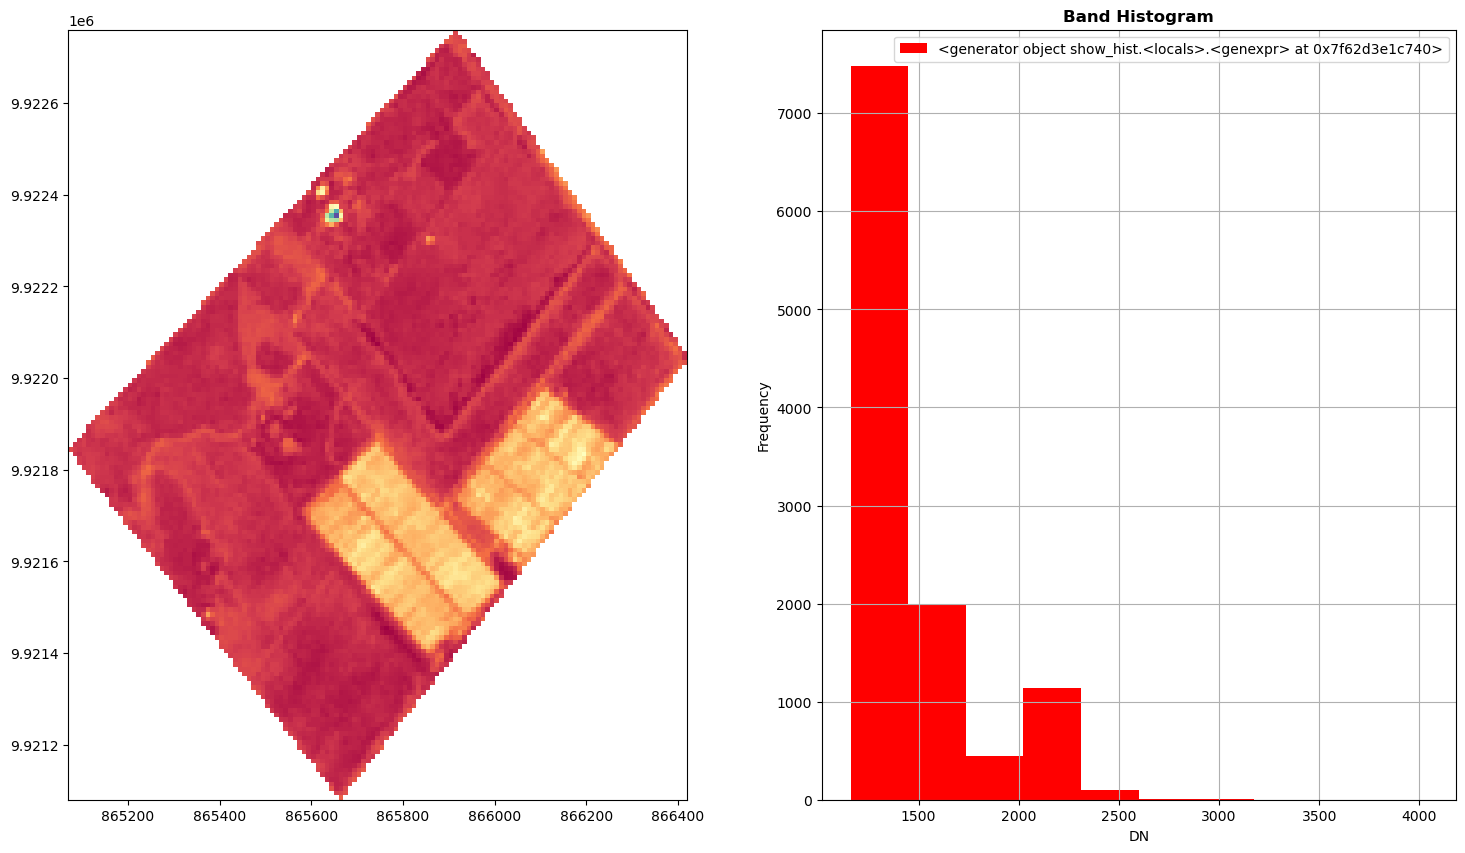

In [30]:
open_and_plot_band('band_2_field.tif')

#### plotting band 3

PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


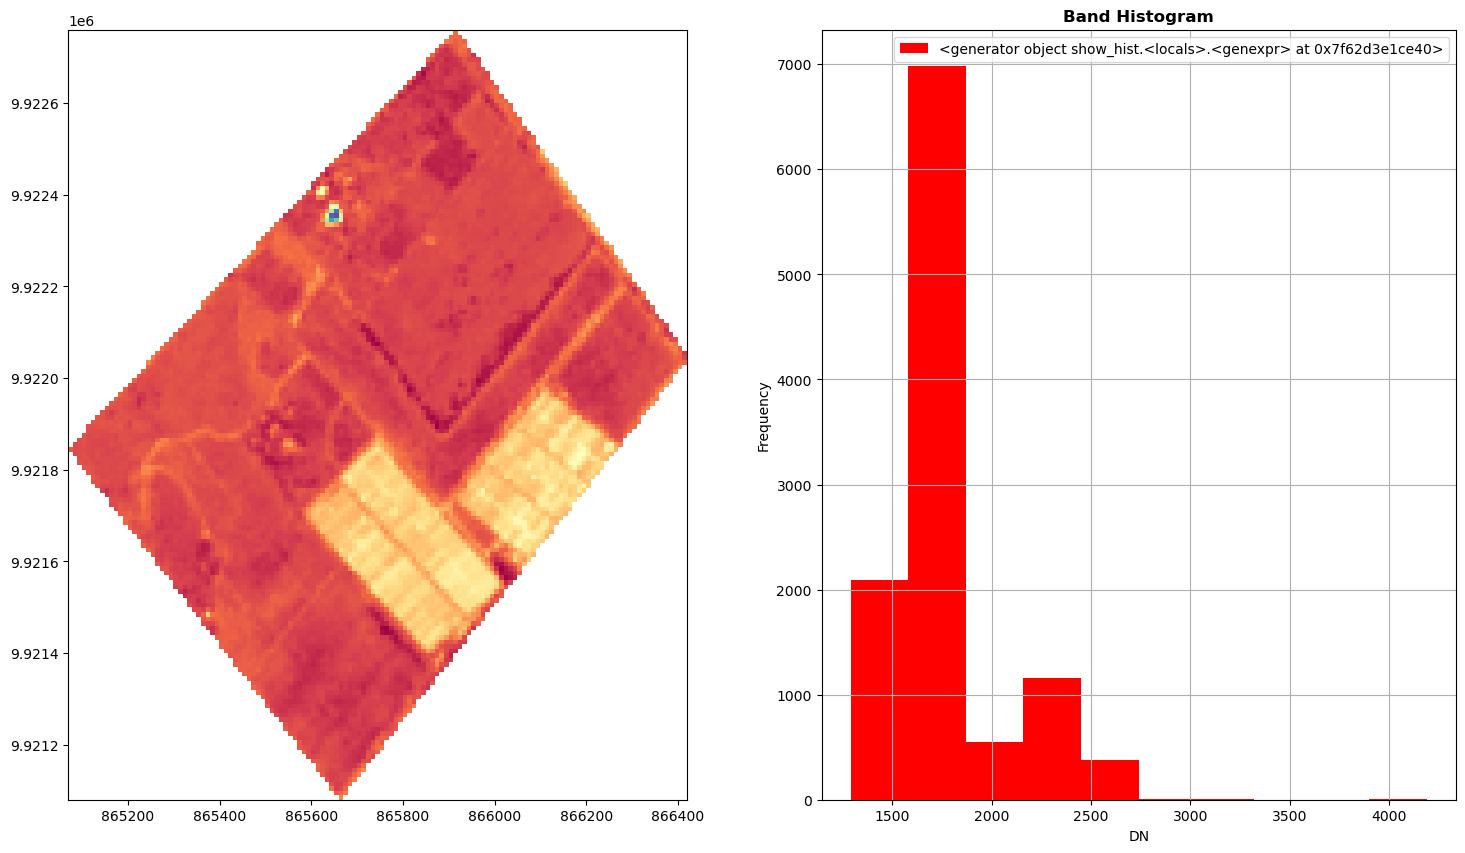

In [31]:
open_and_plot_band('band_3_field.tif')

#### Plotting band 4

PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


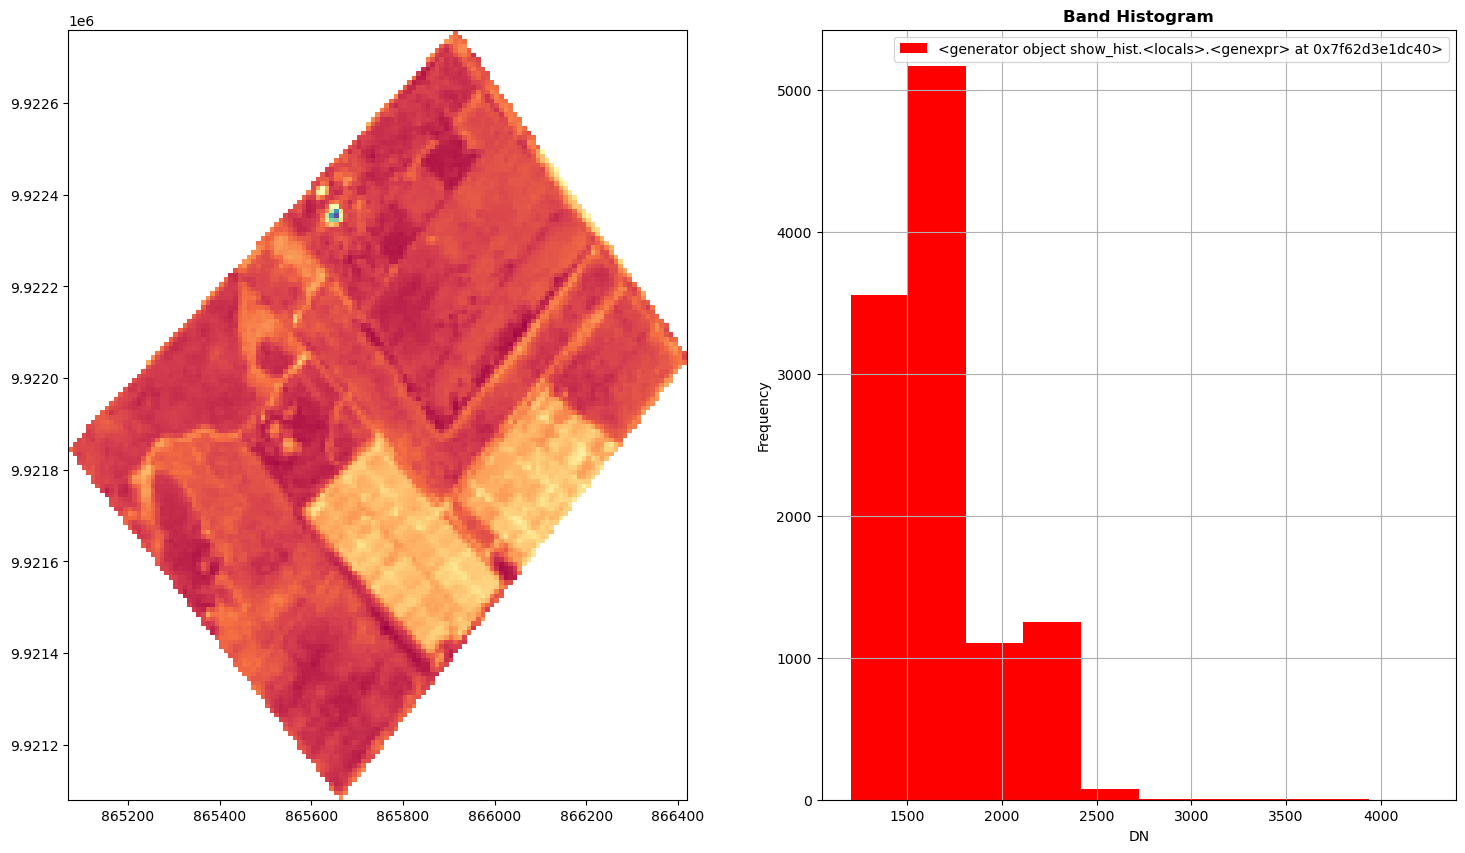

In [32]:
open_and_plot_band('band_4_field.tif')

#### Plotting band 8

PROJCS["WGS 84 / UTM zone 36S",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


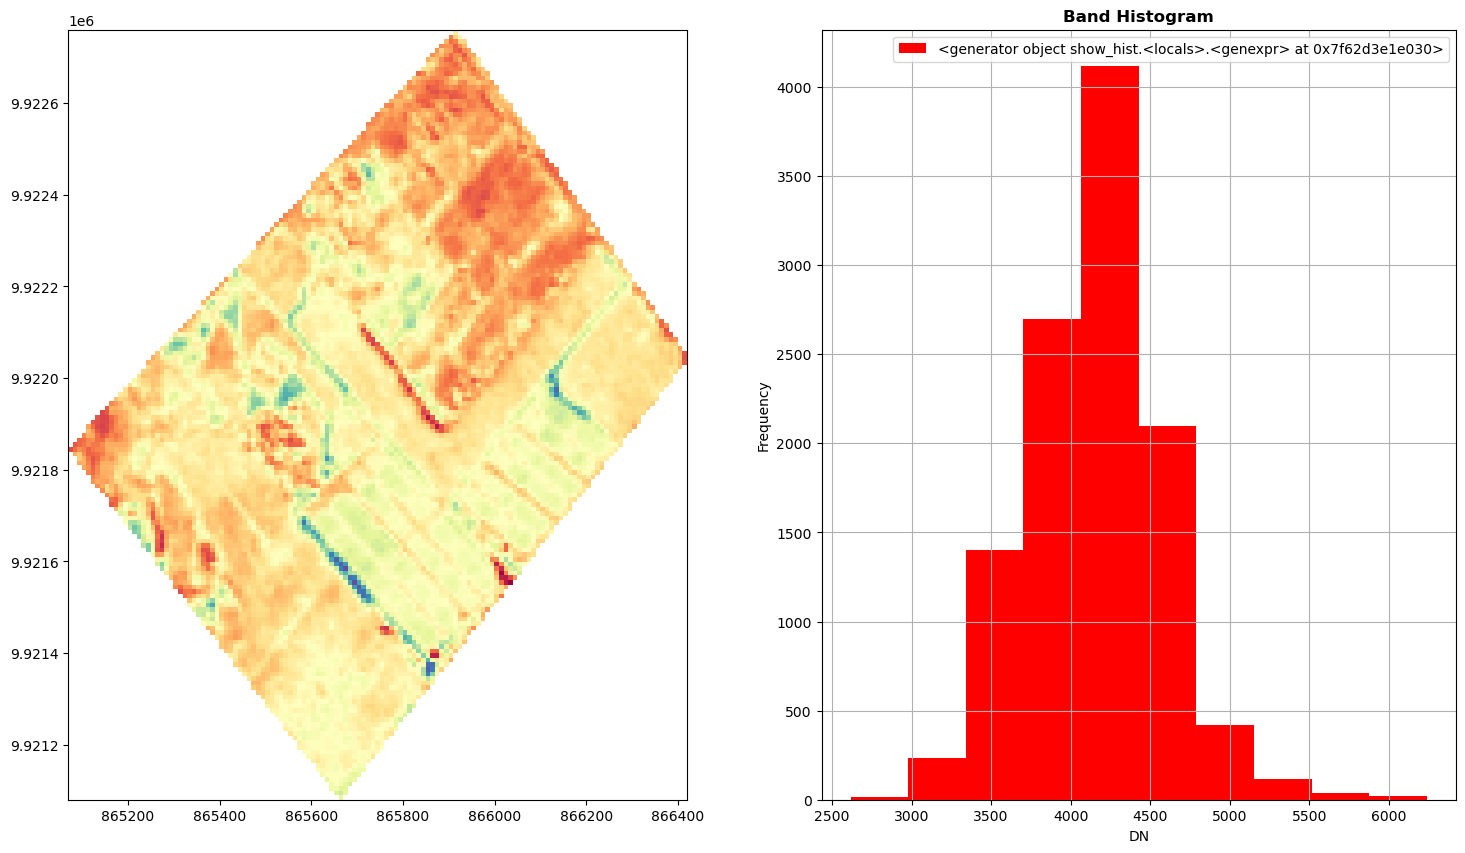

In [33]:
open_and_plot_band('band_8_field.tif')

#### Read Band Data

### Computing NDVI

In [67]:
## initialize the ndvi with np.zeros
##ndvi = np.zeros(band4.shape, dtype=rs.float32)
np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [68]:
band_2 = gdal.Open('band_2_field.tif')
band2 = band_2.ReadAsArray()

In [69]:
band_3 = gdal.Open('band_3_field.tif')
band3 = band_3.ReadAsArray()

In [70]:
band_4 = gdal.Open('band_4_field.tif')
band4 = band_4.ReadAsArray()

In [71]:
band_8 = gdal.Open('band_8_field.tif')
band8 = band_8.ReadAsArray()

In [72]:
ndvi = (band8- band4) / (band8+band4)

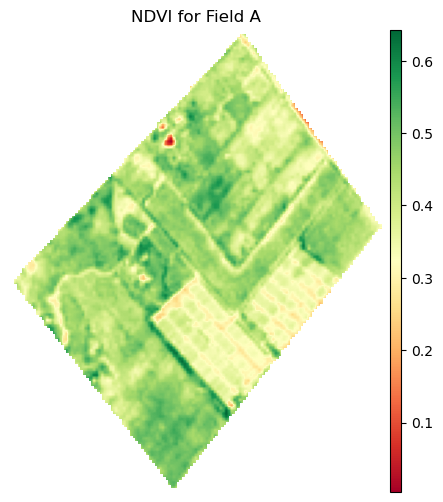

In [79]:
fig, ax = plt.subplots(1, figsize=(18,6))

ep.plot_bands(ndvi, cmap='RdYlGn', title='NDVI for Field A', scale=False, ax=ax)
ax.set_axis_off()

## Using sub-process

In [81]:
import os, subprocess
from osgeo import gdal
import glob

In [88]:
raster_files = glob.glob('R10m/T36MZE_20230528T073621_B*[02:03:04:08]*.jp2')

In [89]:
raster_files

['R10m/T36MZE_20230528T073621_B02_10m.jp2',
 'R10m/T36MZE_20230528T073621_B03_10m.jp2',
 'R10m/T36MZE_20230528T073621_B04_10m.jp2',
 'R10m/T36MZE_20230528T073621_B08_10m.jp2']

> We can use the subprocess module to run a translate, warp and merge for the raster files as if they are being done from 
the command line

In [ ]:
cmd = 'gdal_merge.py -ps 10 -10 -o merged_file.tif'

In [ ]:
subprocess.call(cmd.split() + raster_files)

In [ ]:
We can also use VRT 

In [ ]:
vrt_filez = gdal.BuildVRT("merged_data.vrt",rater_file)

In [ ]:
gdal.Translate("merged_rasters.tif",vrt_filez, xRes=10, yRes=-10)

In [ ]:
vrt = None ## close the vrt